In [26]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib import rcParams
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
# Set up plot specifications
sns.set(style='ticks')
sns.set_style('whitegrid')
sns.set_context("paper", font_scale=1.25, rc={"lines.linewidth": 2})
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams.update({'font.size': 14})
rcParams['font.family'] = 'Avenir'


# Free Vibration (No external force/ moment applied)

- Free Vibration occurs when no external force or moment is applied. 

- First, calulate $I^*$, $c_t^*$ and $k_t^*$ and insert below



In [27]:
# Enter the equivalent values for I, c, k
I_star = 10
c_star = 14
k_star = 490


- Now calculate the natural frequency $\omega_n$ and the damping ratio $\zeta$
- These are given by the following:

$
\begin{equation}
\omega_n = \sqrt[]{\cfrac{k_t^*}{I^*}}  
\end{equation}
$

$
\begin{equation}
\zeta = \cfrac{c_t^*} {2I^*\omega_n}
\end{equation}
$

- Run the cell below to find these values



In [28]:

# Calculate zeta and omega_n
omega_n = np.sqrt(k_star/I_star)
zeta = c_star/ (2*I_star*omega_n)

print(f"Value for Natural Frequency Omega_n is {omega_n}")
print(f"Value for Damping Ratio Zeta is {zeta}; as a percentage it is {zeta*100}%")


Value for Natural Frequency Omega_n is 7.0
Value for Damping Ratio Zeta is 0.1; as a percentage it is 10.0%


## Now we want to calulate a solution to our linearised equation 
- For the underdamped case, that is, $0<\zeta<1$ :


$
\begin{equation}
\tilde{x}(t) = A e^{\zeta\omega_nt} cos(\omega_d + \psi)
\end{equation}
$

where $A$ is the amplitude of the vibration, $\omega_d$ is the damping frequency and $\psi$ is the phase shift. 

Note that we use $\psi$ instead of $\phi$ for free vibration. $\phi$ is used instead for Forced SDOF

A is given by

$
\begin{equation}
A = \sqrt{\tilde{x}(0)^2 + \cfrac{\dot{\tilde{x}}(0)}{\omega_n}}
\end{equation}
$

and $\psi$ is given by

$
\begin{equation}
\psi = -tan^{-1}(\cfrac{\zeta\omega_n\tilde{x}(0) + \dot{\tilde{x}}(0)}{\omega_d\tilde{x}(0)})
\end{equation}
$

keeping in mind to add $\pi$ to the result if $\tilde{x}(0) < 0$


## Enter the initial Conditions Below

The value for Damping frwquency Omgea_d is 6.964912059746339
The value for the amplitude in is 0.10050378152592122m
The value for the phase phi in is 0.1001674211615598m


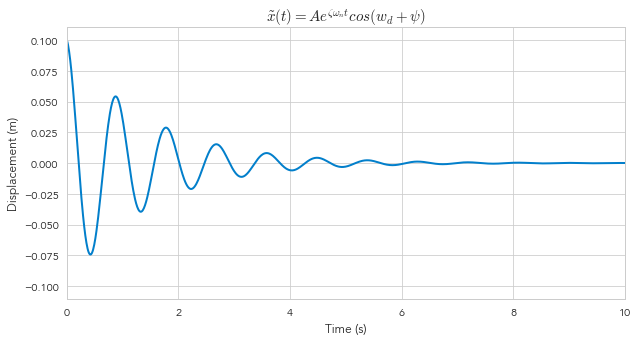

In [29]:
# Enter inital conditions 
x_0 = 0.1
x_tilde_0 = 0.1
x_tilde_dot_0 = 0


#Create a plot with a tex title
t = np.linspace(0,10,num=1000)

omega_d = omega_n * np.sqrt(1-zeta**2)
print (f'The value for Damping frwquency Omgea_d is {omega_d}')


A = np.sqrt(x_tilde_0**2 + ((zeta*omega_n*x_tilde_0 + x_tilde_dot_0)/(omega_d))**2)
print(f'The value for the amplitude in is {A}m')

if x_tilde_0 > 0:
    psi = np.arctan((zeta*omega_n*x_tilde_0 + x_tilde_dot_0)/(omega_d*x_tilde_0))
    print(f'The value for the phase phi in is {psi}m')
else:
    psi = np.pi-np.arctan((zeta*omega_n*x_tilde_0 + x_tilde_dot_0)/(omega_d*x_tilde_0))
    print(f'The value for the phase phi in is {psi}m')


x_tilde_t = A*np.exp(-zeta*omega_n*t)*np.cos(omega_d*t + psi) 


plt.plot(t,x_tilde_t,color='#027FCB')
plt.title(r'$\tilde{x}(t) = A e^{\zeta\omega_nt} cos(w_d + \psi)$', fontsize=15)
plt.xlabel(r'$\zeta$')
plt.ylabel(r'$\omega_n$')

plt.xlim([0, max(t)])
plt.ylim([-11*A/10, 11*A/10])

plt.ylabel('Displacement (m)')
plt.xlabel('Time (s)')

image_path_pdf = 'Free_and_Forced_SDOF/displacement-time.pdf'
image_path_png = 'Free_and_Forced_SDOF/displacement-time.png'
plt.savefig(image_path_pdf, dpi=300, bbox_inches='tight', transparent=False)
plt.savefig(image_path_png, dpi=300, bbox_inches='tight', transparent=False)

# Forced SDOF 

- Forced SDOF occurs when an external force or moment has been applied to the system. 
- The main difference is that the the linearised expression is no longer equal to zero, but rather the force or moment applied.
- It is important to omit the external force/moment when considering Step 5: Equilibrium

- First, calulate $I^*$, $c_t^*$ and $k_t^*$ and insert below


In [30]:
# Enter the equivalent values for I, c, k
I_star = 350*10**3
c_star = 1.9
k_star = 3.6909565 * 10**5

- Now calculate the natural frequency $\omega_n$ and the damping ratio $\zeta$
- These are given by the following:

$
\begin{equation}
\omega_n = \sqrt[]{\cfrac{k_t^*}{I^*}}  
\end{equation}
$

$
\begin{equation}
\zeta = \cfrac{c_t^*} {2I^*\omega_n}
\end{equation}
$

- Run the cell below to find these values

In [31]:

# Calculate zeta and omega_n
omega_n = np.sqrt(k_star/I_star)
zeta = c_star/ (2*I_star*omega_n)

omega_n = 1.054559
zeta = 8.507*10**(-3)
print(f"Value for Natural Frequency Omega_n is {omega_n}")
print(f"Value for Damping Ratio Zeta is {zeta}; as a percentage it is {zeta*100}%")


Value for Natural Frequency Omega_n is 1.054559
Value for Damping Ratio Zeta is 0.008507; as a percentage it is 0.8507%


## Now we look at the Force 
- Harmonic Forces are very common and follow the form


$
\begin{equation}
\tilde{F} = F_o^*cos(\omega t + \varphi_o^*)
\end{equation}
$

- If the force is a of the form $\tilde{F} = F_o^*sin(\omega t + \varphi)$, simply add $\frac{\pi}{2}$ to the phase angle. 
- I.e 
$
\begin{equation}
\tilde{F} = F_o^*sin(\omega t + \varphi) = F_o^*cos(\omega t +( \varphi + \frac{\pi}{2}))
\end{equation}
$

Enter the corresponding values for $F_o^*$, $\varphi_o^*$ and the frequency $\omega$ below

In [32]:
# F_o_star = 19
# phi_o_star = 0
omega = 0.8378


## Particular solution 

- Usually we can just look at the particular solution and ignore the homogenous solution. 
    - This is because the homogenous solution (found in the free vibration section) is only applicable for the beginning of operation ($\zeta$ describes the decay)
- The particular solution $\tilde{x}_p(t)$ is given by

$
\begin{equation}
\tilde{x}_p(t) = Xcos(\omega t + \varphi)
\end{equation}
$

where $X$ is the amplitude, $\varphi$ is the phase shift.

The expression for $X$ is given by 

$
\begin{equation}
X = \cfrac{F_o^*/k^*}{\sqrt{(1-(\cfrac{\omega}{\omega_n})^2)^2 + (2\zeta\cfrac{\omega}{\omega_n})^2}}
\end{equation}
$

and the expression for $\varphi$ is given by

$
\begin{equation}
\varphi = \varphi_o^* - tan^{-1}(\cfrac{2\zeta\frac{\omega}{\omega_n}}{1-(\frac{\omega}{\omega_n})^2})
\end{equation}
$

In [37]:
X = 0.145*10**-3
F_o_star= (X*k_star)*np.sqrt((1-(omega/omega_n)**2)**2 + (2*zeta*(omega/omega_n))**2) 
# X = (F_o_star/k_star)/np.sqrt((1-(omega/omega_n)**2)**2 + (2*zeta*(omega/omega_n))**2)
# phi = phi_o_star - np.arctan((2*zeta*(omega/omega_n))/(1-(omega/omega_n)**2))
phi = 0
print(f"Value for Amplitude X is {X} m")
#print(f"Value for phi is {phi} rad")

F_o_star

Value for Amplitude X is 0.000145 m


19.75319107036639

## Graph of $\tilde{x}_p(t)$

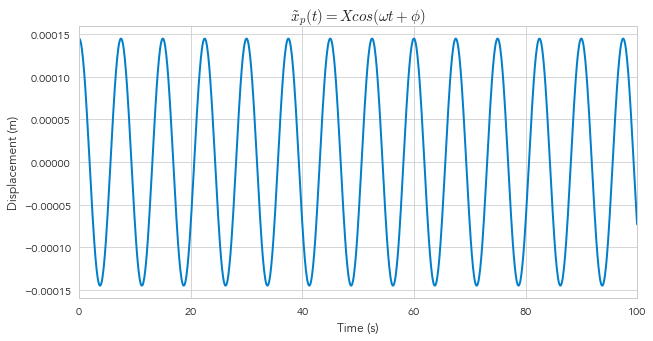

In [38]:
#Create a plot with a tex title
# Adjust second paramter to add/reduce number of periods shown
t = np.linspace(0,100,num=1000)
x_p = X * np.cos(omega*t + phi)


plt.plot(t,x_p,color='#027FCB')
plt.title(r'$\tilde{x}_p(t) =  Xcos(\omega t + \phi)$', fontsize=15)
plt.xlabel(r'$\zeta$')
plt.ylabel(r'$\omega_n$')

plt.xlim([0, max(t)])
plt.ylim([-11*X/10, 11*X/10])

plt.ylabel('Displacement (m)')
plt.xlabel('Time (s)')

image_path_pdf = 'Free_and_Forced_SDOF/particular_sol.pdf'
image_path_png = 'Free_and_Forced_SDOF/particular_sol.png'
plt.savefig(image_path_pdf, dpi=300, bbox_inches='tight', transparent=False)
plt.savefig(image_path_png, dpi=300, bbox_inches='tight', transparent=False)

## Vibration Amplitude as a function of Force Frequency

- This is a graph of $X(\omega)$ against $\omega$

The graph begins at 5.35e-05 and peaks when omega is 1.055


5.351781054684982e-05

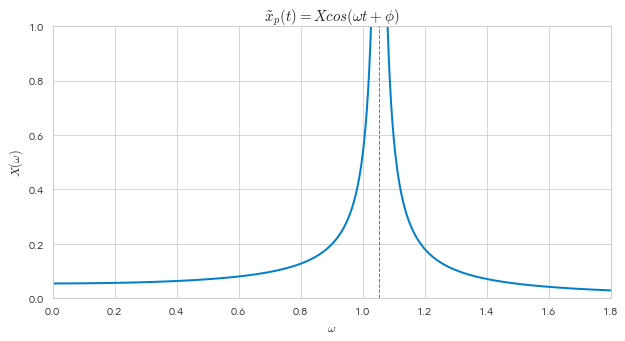

In [61]:

omega_graph = np.linspace(0,2,num=10000)
X_graph = (F_o_star/k_star)/np.sqrt((1-(omega_graph/omega_n)**2)**2 + (2*zeta*(omega_graph/omega_n))**2)

plt.plot(omega_graph,X_graph*1000,color='#027FCB')
plt.title(r'$\tilde{x}_p(t) =  Xcos(\omega t + \phi)$', fontsize=15)
plt.xlabel(r'$\zeta$')
plt.ylabel(r'$\omega_n$')

plt.xlim([0,1.8])
plt.ylim([0,1])
plt.xlabel(r'$\omega$')
plt.ylabel(r'$X(\omega)$')

plt.vlines(omega_n,0, np.max(X_graph) * 1000, linewidth=1, linestyle="dashed", color = '#F5510E')

image_path_pdf = 'Free_and_Forced_SDOF/Amplitude-Force_Frequency.pdf'
image_path_png = 'Free_and_Forced_SDOF/Amplitude-Force_Frequency.png'
plt.savefig(image_path_pdf, dpi=300, bbox_inches='tight', transparent=False)
plt.savefig(image_path_png, dpi=300, bbox_inches='tight', transparent=False)




print(f'The graph begins at {round(F_o_star/k_star,7)} and peaks when omega is {round(omega_n,3)}')
k_star
F_o_star/k_star